In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, StandardScaler, PowerTransformer
, MinMaxScaler
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, roc_auc_score


In [ ]:

df = pd.DataFrame(pd.read_csv("./playground-series-s4e10/cleaned_train.csv"))
train_df, valid_df = train_test_split(df, test_size=0.2, random_state=42)

In [37]:


y_train = train_df["loan_status"]  
X_train = train_df.drop(["loan_status"], axis=1)
y_valid = valid_df["loan_status"] 
X_valid = valid_df.drop(["loan_status"], axis=1)  

lr_model = LogisticRegression( max_iter=1000, C=1)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_valid)
lr_report = classification_report(y_valid, y_pred, zero_division=0)
print("Classification Report logistic regression:")
print(lr_report)
print("*"*100)

print("Classification Report random forest:")
rf_model = RandomForestClassifier(max_depth=200, n_estimators=150, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_valid)
print(classification_report(y_valid, y_pred, zero_division=0))
print("*"*100)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_valid)
print("Classification Report decision tree:")
print(classification_report(y_valid, y_pred, zero_division=0))


Classification Report logistic regression:
              precision    recall  f1-score   support

         0.0       0.82      0.81      0.82      5081
         1.0       0.81      0.82      0.81      4977

    accuracy                           0.82     10058
   macro avg       0.82      0.82      0.82     10058
weighted avg       0.82      0.82      0.82     10058

****************************************************************************************************
Classification Report random forest:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      5081
         1.0       0.98      0.94      0.96      4977

    accuracy                           0.97     10058
   macro avg       0.97      0.96      0.96     10058
weighted avg       0.97      0.97      0.96     10058

****************************************************************************************************
Classification Report decision tree:
              precision    

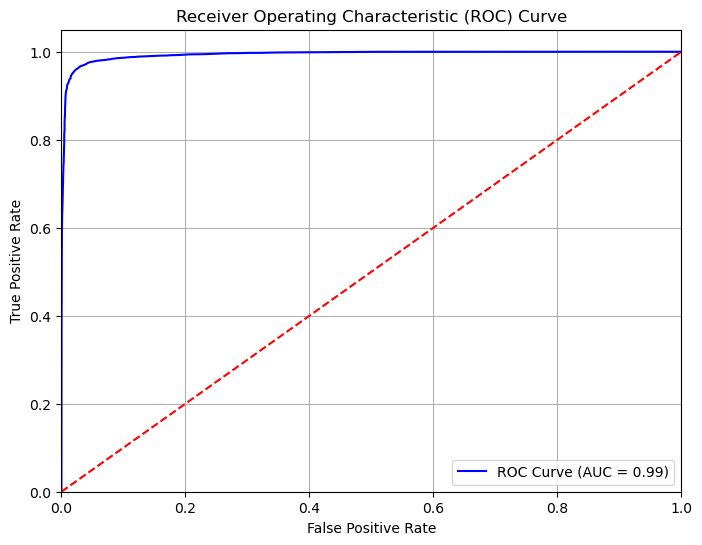

Training Accuracy: 1.0000, Training ROC AUC: 1.0000
Validation Accuracy: 0.9650, Validation ROC AUC: 0.9937


{'train_accuracy': 1.0,
 'valid_accuracy': 0.965002982700338,
 'train_roc_auc': 1.0,
 'valid_roc_auc': 0.9936944742113665,
 'fit_assessment': 'The model is likely overfitting.'}

In [38]:
def evaluate_model(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train)
    y_valid_prob = model.predict_proba(X_valid)[:, 1]  # Get probabilities for the positive class
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)

    # Calculate bias and variance
    bias = np.mean((y_valid - y_valid_pred) ** 2)  # Mean Squared Error
    variance = np.var(y_valid_pred)  # Variance of predictions
    
    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_valid, y_valid_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    return bias, variance, roc_auc

def assess_model_fit(model, X_train, X_valid, y_train, y_valid):
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    train_roc_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    valid_roc_auc = roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1])
    
    print(f'Training Accuracy: {train_accuracy:.4f}, Training ROC AUC: {train_roc_auc:.4f}')
    print(f'Validation Accuracy: {valid_accuracy:.4f}, Validation ROC AUC: {valid_roc_auc:.4f}')

    fit_assessment = ""
    if train_accuracy < 0.7 and valid_accuracy < 0.7:
        fit_assessment = "The model is likely underfitting."
    elif train_accuracy > valid_accuracy:
        fit_assessment = "The model is likely overfitting."
    else:
        fit_assessment = "The model is performing well."

    return {
        'train_accuracy': train_accuracy,
        'valid_accuracy': valid_accuracy,
        'train_roc_auc': train_roc_auc,
        'valid_roc_auc': valid_roc_auc,
        'fit_assessment': fit_assessment
    }


bias, variance, roc_auc = evaluate_model(rf_model, X_train, y_train, X_valid, y_valid)
assess_model_fit(rf_model, X_train, X_valid, y_train, y_valid)


In [39]:
test_df = pd.DataFrame(pd.read_csv("./playground-series-s4e10/test.csv"))
test_df_id = test_df.id
test_df.drop(["id"], axis=1,inplace=True)
test_df["person_age"] = RobustScaler().fit_transform(np.log10(test_df[["person_age"]]))
test_df["person_income"] = RobustScaler().fit_transform(np.log10(test_df[["person_income"]]))
test_df["person_emp_length"] = RobustScaler().fit_transform(np.log10(1+test_df[["person_emp_length"]]))
test_df["loan_amnt"] = RobustScaler().fit_transform(np.sqrt(test_df[["loan_amnt"]]))
test_df["loan_int_rate"] = RobustScaler().fit_transform(np.sqrt(test_df[["loan_int_rate"]]))
test_df["loan_percent_income"] = RobustScaler().fit_transform(np.sqrt(test_df[["loan_percent_income"]]))
test_df["cb_person_cred_hist_length"] = RobustScaler().fit_transform(np.log10(test_df[["cb_person_cred_hist_length"]]))



In [40]:
def label_encode_grades(alphabet):
    grade = {
        "A" : 7,
        "B" : 6,
        "C" : 5,
        "D" : 4,
        "E" : 3,
        "F" : 2,
        "G" : 1
    }
    return grade[alphabet]

def label_encode_defaulted(bool_word):
    bool_value = {
       "Y" : 1,
       "N" : 0 
    }
    return bool_value[bool_word]
    

test_df["loan_grade"] = test_df["loan_grade"].apply(lambda x : label_encode_grades(x))
test_df["cb_person_default_on_file"] = test_df["cb_person_default_on_file"].apply(lambda x : label_encode_defaulted(x))
test_df.head(1)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,-0.461426,0.293574,RENT,-0.227505,HOMEIMPROVEMENT,2,1.768333,0.867178,1.427004,0,-0.706695


In [41]:


column_names = test_df.columns
final_df  = pd.get_dummies(test_df, columns=['person_home_ownership','loan_intent']).astype(np.float64)

test_df = final_df.copy(deep=True)

In [42]:
y_sub = rf_model.predict(test_df)

combined_array = np.column_stack((test_df_id, y_sub))
df_sub = pd.DataFrame(combined_array, columns=['id', 'loan_status'])
df_sub.head()


,id,loan_status
0,58645.0,1.0
1,58646.0,0.0
2,58647.0,1.0
3,58648.0,0.0
4,58649.0,0.0


In [44]:
df_sub.to_csv("./playground-series-s4e10/submission.csv", index=False)

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.metrics import AUC


m,n = X_train.shape
nn_model = Sequential()
nn_model.add(Dense(n, activation='relu', input_shape=(n,)))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[AUC()])

history = nn_model.fit(X_train, y_train, 
                    validation_data=(X_valid, y_valid), 
                    epochs=15, 
                    batch_size=16)

Epoch 1/15
5658/5658 [==============================] - 18s 3ms/step - loss: 0.4182 - auc_1: 0.8913 - val_loss: 0.3364 - val_auc_1: 0.9264
Epoch 2/15
5658/5658 [==============================] - 20s 4ms/step - loss: 0.3582 - auc_1: 0.9182 - val_loss: 0.3349 - val_auc_1: 0.9297
Epoch 3/15
5658/5658 [==============================] - 29s 5ms/step - loss: 0.3459 - auc_1: 0.9228 - val_loss: 0.3300 - val_auc_1: 0.9325
Epoch 4/15
5658/5658 [==============================] - 28s 5ms/step - loss: 0.3412 - auc_1: 0.9245 - val_loss: 0.3222 - val_auc_1: 0.9338
Epoch 5/15
5658/5658 [==============================] - 29s 5ms/step - loss: 0.3391 - auc_1: 0.9256 - val_loss: 0.3200 - val_auc_1: 0.9334
Epoch 6/15
5658/5658 [==============================] - 29s 5ms/step - loss: 0.3361 - auc_1: 0.9266 - val_loss: 0.3191 - val_auc_1: 0.9344
Epoch 7/15
5658/5658 [==============================] - 21s 4ms/step - loss: 0.3354 - auc_1: 0.9265 - val_loss: 0.3123 - val_auc_1: 0.9356
Epoch 8/15
5658/5658 [=====

In [46]:
y_sub = nn_model.predict(test_df)
threshold = 0.5

y_sub = (y_sub >= threshold).astype(int)
combined_array = np.column_stack((test_df_id, y_sub))
df_sub = pd.DataFrame(combined_array, columns=['id', 'loan_status'])

df_sub.to_csv("./playground-series-s4e10/nn_sub.csv", index=False)


1222/1222 [==============================] - 2s 2ms/step
